
# Project 1: Medical Appointments No-Shows Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Medical Appointment No Shows** data collects information from 100k medical appointments in Brazil to explore whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row:
> - *ScheduledDay:* Day of Appointment.
> - *Neighborhood:* Patient Location.
> - *Scholarship:*   whether or not the patient is enrolled in Brasilian welfare program.
> - *SMS_recieved*:  whether or not the patient recieved an SMS for appointment.
> - *Hypertension, diabetes, alcoholism, handcap:* whether or not the patient suffers from any of these

>    *More information about this data could be found* [here]( https://www.kaggle.com/joniarroba/noshowappointments)
>  

> *We are going to analyze this data to answer 2 research questions:*  

> **Our research questions are:**
> 1. May sending reminder SMS to patients improve thier compliance to medical appointments?
> 2. Is the show up rate to medical appointments assocciated with gender? 


>  **Let's start by loading necessary packages that we are going to use in our analysis** 

### loading needed packages:

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Now, we will load our data and check for its cleanliness and tidiness

### Loading data:

In [104]:
# Loading data:

df = pd.read_csv('non_show_app.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Examining Data

> Know we will investigate data shape and look for possible missed or duplicated data records

In [24]:
df.shape

(110527, 14)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**From the above results, it seems that there are no missing data in our dataset, and  the data types of all columns of our interest (Gender, SMS_received and No-show columns) are correct.**   
  
  **Then we will check for duplicated rows:**   
    
    

In [26]:
print(df.duplicated().sum())

0


**No exactly duplicated rows found, awesome. But let's dive more deeply to check if there are duplicated data for the same patient with different records in other columns: **

In [27]:
print(df.PatientId.duplicated().sum())

48228


So there are many duplicated patient IDs. But let's see if these records are for different appoinmtents:

In [28]:
print(df.AppointmentID.duplicated().sum())

0


As there are no duplicated appointments, then duplicated patients id are due to different appointments to the same patient which is normal and expected.   
**Now let's explore data consistency in our columns of interest:**

In [106]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [107]:
df['SMS_received'].unique()

array([0, 1], dtype=int64)

In [108]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

> Now We did know that there are no missing or duplicated values, the data types are correct and values are consistent between all observations in our  coulmns of interest. We just need to:
> 1. Rename our columns of interest to follow python naming conventions.
> 2. Recode our response variable **"no_show"** to be (1) for "Yes" and (0) for "No" for easier analysis later.
> 3. We  will also select only columns that we will need in our analysis later in order to be more concentrated:




## Data Cleaning

   > **1- Columns Renaming:**

In [109]:
df.rename(columns={'No-show': 'no_show', 'Gender': 'gender' }, inplace=True)
df.head(1)

,PatientId,AppointmentID,gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> **2. Recoding "no_show" column:**  

>  To simplify our analysis later, we will apply the following function to  the reaponse variable **"no_show"**

In [110]:
# We will build a function called (Recode) that 
# takes the (Yes , No) coding for the response variable "no_show"  and returns (0, 1) coding instaed for easier analysis

def Recode(column):
    if column == 'Yes':
        return 1
    elif column  == 'No':
        return 0
    else: return column


**Let's apply our function and check it:**

In [111]:
df['no_show']= df['no_show'].apply(Recode)
df['no_show'].unique()

array([0, 1], dtype=int64)

**Now:** let's take a general idea about our data by plotting a correlation matrix to see the relationships between variables 

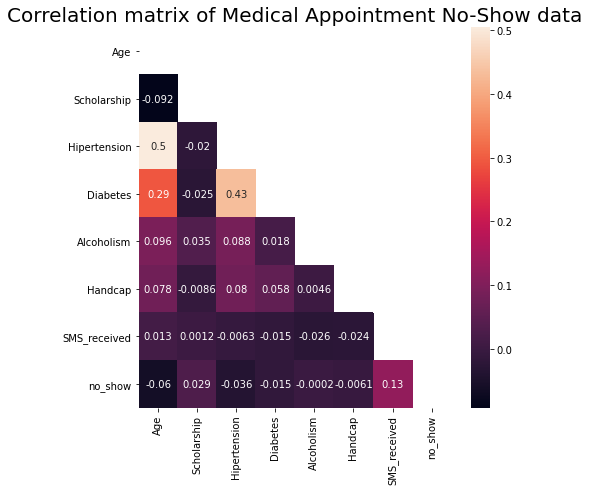

In [112]:
correlation_mat = df.iloc[:, 2:].corr()
plt.figure(figsize=(7,7))
mask = np.triu(np.ones_like(correlation_mat, dtype=bool))
sns.heatmap(correlation_mat, mask = mask, annot = True)
mask = np.triu(np.ones_like(correlation_mat))
plt.title("Correlation matrix of Medical Appointment No-Show data", fontsize=20);

It seems that the response varaible **"no-show"** is weekly correlated to most of other variables. But let's dive more deeply to see its relationship with our selected predictor variables **" Gender & Reminder SMS"**

> **2. Selecting Columns:**

> first let's view the index number and label for each column:

In [113]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
for i, v in enumerate(df.columns):
    print(i, v)


0 PatientId
1 AppointmentID
2 gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 no_show


Then, we could  make a new data frame with only columns of interest (df_clean)

In [114]:
df_clean = df.iloc[:, np.r_[:3, 12:14]]
df_clean.head()


,PatientId,AppointmentID,gender,SMS_received,no_show
0,2.987250e+13,5642903,F,0,0
1,5.589978e+14,5642503,M,0,0
2,4.262962e+12,5642549,F,0,0
3,8.679512e+11,5642828,F,0,0
4,8.841186e+12,5642494,F,0,0


<a id='eda'></a>
## Exploratory Data Analysis


  
  

### Q1. May Sending reminder SMS to patient  improve thier compliance to medical appointments?


> **Let's divide the dataframe into two sets, one for patients who recieved SMS and the other for those who didn't** to investigate number of show **vs.** no-show for each

In [116]:
df_SMS_yes = df_clean.query('SMS_received == 1')
df_SMS_no = df_clean.query('SMS_received == 0')

> **A) For patients who recieved reminder SMS:**

In [117]:
 df_SMS_yes_show = df_SMS_yes.groupby('no_show').AppointmentID.count()
df_SMS_yes_show

no_show
0    25698
1     9784
Name: AppointmentID, dtype: int64

So, 25698  patients who recieved SMS showed up for thier appointments  while 9784 did not (**N.B.** the column "no_show" is coded "1" for No-show and "0" for show). *Lets see results graphically:*


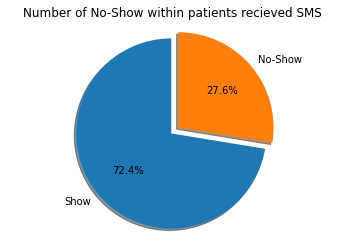

In [127]:
labels = 'Show', 'No-Show'
sizes = [25698, 9784]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("Number of No-Show within patients recieved SMS ")
plt.show()

> **B) For those who didn't recieve reminder SMS:**

In [128]:
df_SMS_no_show = df_SMS_no.groupby('no_show').AppointmentID.count()
df_SMS_no_show


no_show
0    62510
1    12535
Name: AppointmentID, dtype: int64

So, 62510  patients who didn't recieved SMS showed up for thier appointments  while 12535 did not . *Lets see results graphically too:*


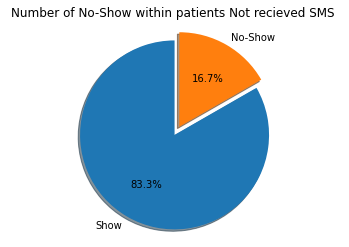

In [129]:
labels = 'Show', 'No-Show'
sizes = [62510, 12535]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("Number of No-Show within patients Not recieved SMS ")

plt.show()

>    **Now Let's compare between the number of No-Show beween the two groups:**

In [132]:
SMS_yes_Noshow = df_SMS_yes.query('no_show == 1').AppointmentID.count()

SMS_yes_Noshow

9784

In [134]:
SMS_No_Noshow = df_SMS_no.query('no_show == 1').AppointmentID.count()

SMS_No_Noshow

12535

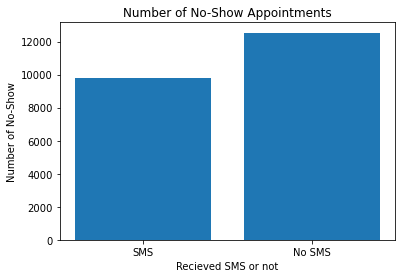

In [135]:
plt.bar(["SMS", "No SMS"], [SMS_yes_Noshow, SMS_No_Noshow],)
plt.title("Number of No-Show Appointments")
plt.xlabel("Recieved SMS or not")
plt.ylabel("Number of No-Show");

> Although higher number of patients who didn't recieve reminder SMS missed thier medical appointment, but we noticed that the total number of both groups are not equal. Therefore, it is better to compare proportions rather than absolute numbers to get more insights about wither sending reminder SMS to patient may improve thier compliance to medical appointments or not:

In [136]:
SMS_yes_total = df_SMS_yes.AppointmentID.nunique()
SMS_yes_total

35482

In [139]:
SMS_no_total = df_SMS_no.AppointmentID.nunique()
SMS_no_total

75045

In [140]:
prop_SMS_yes = SMS_yes_Noshow/SMS_yes_total*100
prop_SMS_yes
prop_SMS_no = SMS_No_Noshow/SMS_no_total*100
prop_SMS_yes, prop_SMS_no

(27.574544839637, 16.703311346525417)

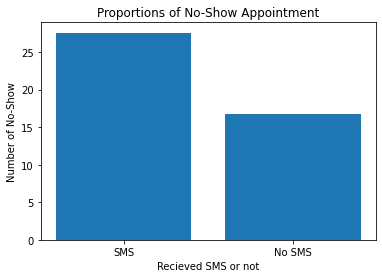

In [141]:
plt.bar(["SMS", "No SMS"], [prop_SMS_yes, prop_SMS_no],)
plt.title("Proportions of No-Show Appointment")
plt.xlabel("Recieved SMS or not")
plt.ylabel("Number of No-Show");

> Unexpectedly, the percentage of patients who didn't show up for medical appointment is higher among those who recieved reminder SMS compared to those who didn't recieve. Thus; We have no evidence that sending reminder SMS to patients may improve thier compliance to show up for medical appointment.

### 2. Is the show up rate to medical appointment assocciated with gender?


> **Let's divide the dataframe into two sets, one for each gender** to investigate number of show **vs.** no-show for each

In [143]:
df_M = df_clean.query('gender == "M"')
df_F = df_clean.query('gender == "F"')

In [144]:
 df_M_show = df_M.groupby('no_show').AppointmentID.count()
df_M_show

no_show
0    30962
1     7725
Name: AppointmentID, dtype: int64

So, 30962 male patients showed up for thier appointments  while 7725 did not (**N.B.** the column "no_show" is coded "1" for No-show and "0" for show). *Lets see results graphically:*


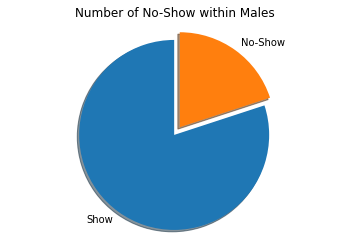

In [151]:
labels = 'Show', 'No-Show'
sizes = [30962, 7725]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("Number of No-Show within Males")

plt.show()

> - **For Females:**

In [146]:
df_females = df_F.groupby('no_show').AppointmentID.count()
df_females


no_show
0    57246
1    14594
Name: AppointmentID, dtype: int64

57246 female patients showed up for thier appointments  while 14594 did not 


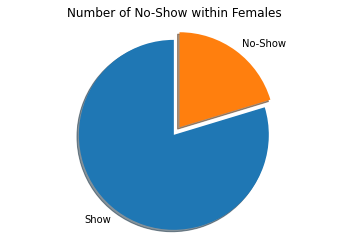

In [150]:
labels = 'Show', 'No-Show'
sizes = [57246, 14594]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("Number of No-Show within Females")

plt.show()

> **- Now, Let's compare the number of No-Show between genders:**

In [153]:
M_No_show = df_M.query('no_show ==1').AppointmentID.count()

M_No_show

7725

In [154]:
F_No_show = df_F.query('no_show ==1').AppointmentID.count()

F_No_show

14594

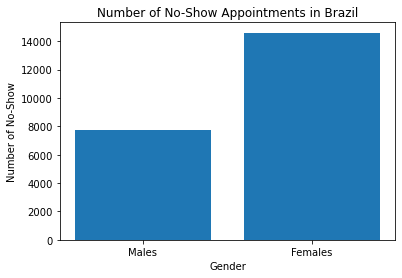

In [155]:
plt.bar(["Males", "Females"], [M_No_show, F_No_show],)
plt.title("Number of No-Show Appointments in Brazil")
plt.xlabel("Gender")
plt.ylabel("Number of No-Show");

Although the number of No-Show are higher for females, but we should consider thst the total number of females are also higher, So it is more appropriate to compare proportion rather than absolute count:

In [156]:
M_total = df_M.AppointmentID.nunique()
M_total

38687

In [157]:
F_total = df_F.AppointmentID.nunique()
F_total

71840

In [158]:
prop_M = M_No_show/M_total*100
prop_M
prop_F = F_No_show/F_total*100
prop_M, prop_F

(19.967947889471915, 20.31458797327394)

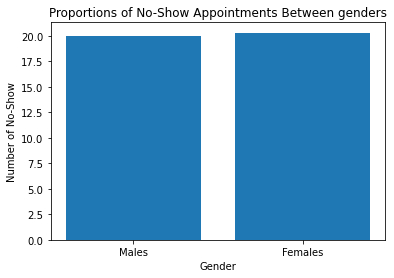

In [159]:
plt.bar(["Males", "Females"], [prop_M, prop_F],)
plt.title("Proportions of No-Show Appointments Between genders")
plt.xlabel("Gender")
plt.ylabel("Number of No-Show");

**So it is now clear that the percentage response to medical appointment is nearly equal between mals and females**

<a id='conclusions'></a>
## Conclusions

> **Results:**  After we finished our analysis we may conclude that
> 1. We have no enough evidence that sending reminder SMS to patient could improve thier compliance to medical appointments. 
> 2. We didn't found correlation between gender and percentage compliance of patients to show uo for medical appointments as the proportions of males and females was nearly equal.  


> **Limitations:** However, there are two limitations in this analysis:

> 1.  More investigations and ststistical test may be performed to get more solid conclusions about these finding which were beyound our research purpose in this project. 
> 2. Also there were many other variables that we didn't consider in this research would give more ideas about this dataset.

### References:
> * https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.pie.html
> * https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/
> * https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/#:~:text=The%20drop%20function%20returns%20a,there%20is%20no%20returned%20value.&text=when%20inplace%3DTrue-,data.,1%2C%20inplace%3DTrue).
> * https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
> * https://seaborn.pydata.org/examples/many_pairwise_correlations.html
